In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [74]:
df = pd.read_csv('attendance.csv')
df.head()

,EventID,EventName,EventType,Date,StartTime,EndTime,Location,Capacity,ActualAttendance,Weather_Condition,Promotion_Type
0,1005,Artisan Fair,Exhibition,2024-05-18,11:00:00,18:00:00,City Park,300,225,Sunny,Posters in Local Businesses
1,1006,Tech Startup Pitch Night,Networking,2024-06-03,18:30:00,21:30:00,Coworking Space,100,85,Clear Skies,Online Ads
2,1007,Poetry Slam,Performance,2024-06-22,19:00:00,22:00:00,Local Cafe,75,60,Partly Cloudy,Word of Mouth
3,1008,Charity 5K Run,Fundraiser,2024-07-14,08:00:00,11:00:00,Riverfront Trail,500,400,Overcast,Radio Spots
4,1009,Outdoor Concert Series,Music,2024-07-27,18:00:00,22:00:00,Amphitheater,2000,1800,Clear Skies,TV Commercials


In [75]:
df = df[['EventID', 'EventName', 'EventType', 'Date', 'StartTime', 'EndTime', 'Location', 'Weather_Condition', 'Promotion_Type', 'Capacity', 'ActualAttendance']]


In [76]:
df['EventID'] = df.reset_index().index + 1005
df

,EventID,EventName,EventType,Date,StartTime,EndTime,Location,Weather_Condition,Promotion_Type,Capacity,ActualAttendance
0,1005,Artisan Fair,Exhibition,2024-05-18,11:00:00,18:00:00,City Park,Sunny,Posters in Local Businesses,300,225
1,1006,Tech Startup Pitch Night,Networking,2024-06-03,18:30:00,21:30:00,Coworking Space,Clear Skies,Online Ads,100,85
2,1007,Poetry Slam,Performance,2024-06-22,19:00:00,22:00:00,Local Cafe,Partly Cloudy,Word of Mouth,75,60
3,1008,Charity 5K Run,Fundraiser,2024-07-14,08:00:00,11:00:00,Riverfront Trail,Overcast,Radio Spots,500,400
4,1009,Outdoor Concert Series,Music,2024-07-27,18:00:00,22:00:00,Amphitheater,Clear Skies,TV Commercials,2000,1800
...,...,...,...,...,...,...,...,...,...,...,...
616,1621,Halloween Haunted House,Entertainment,2039-10-31,19:00:00,23:00:00,Abandoned Building,Sunny,Targeted Ads,300,290
617,1622,NaNoWriMo Write-a-thon,Educational,2039-11-15,10:00:00,20:00:00,Library,Partly Cloudy,School Outreach,100,98
618,1623,Charity Thanksgiving Dinner,Fundraiser,2039-11-29,17:00:00,20:00:00,Community Center,Cloudy,Social Media Campaign,200,195
619,1624,Holiday Craft Market,Cultural,2039-12-13,10:00:00,18:00:00,Convention Center,Snowy,Radio Advertisements,500,480


In [77]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['EventID', 'Capacity']

In [78]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
discrete_feature

[]

In [79]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['EventID']]
continuous_feature

['Capacity']

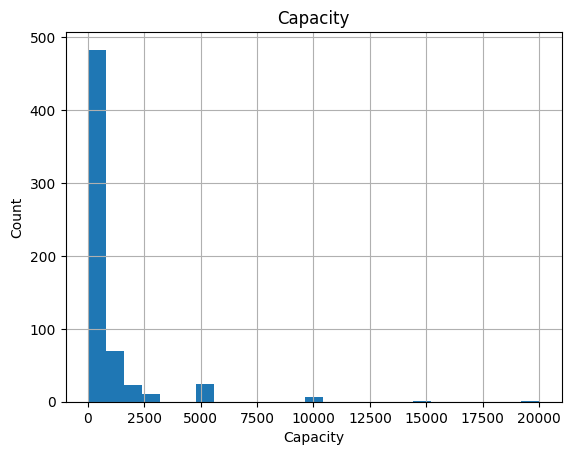

In [80]:
for feature in continuous_feature :
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [81]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['ActualAttendance']=np.log(data['ActualAttendance'])
        plt.scatter(data[feature],data['ActualAttendance'])
        plt.xlabel(feature)
        plt.ylabel('')
        plt.title(feature)
        plt.show()
        

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

This implies presence of Nan Values, hence we replace those nan values with the median values.


In [92]:

# Calculate the median value
median_value = df['ActualAttendance'].median()

# Replace NaN values with the median
df['ActualAttendance'] = df['ActualAttendance'].fillna(median_value)


In [95]:
df.isna().sum()

EventID              0
EventName            0
EventType            0
Date                 0
StartTime            0
EndTime              0
Location             0
Weather_Condition    0
Promotion_Type       0
Capacity             0
ActualAttendance     0
dtype: int64

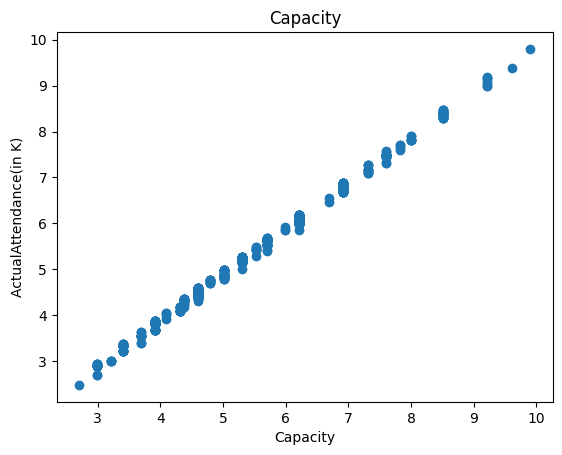

In [97]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        if data['ActualAttendance'].dtype == 'O':
            data['ActualAttendance'] = pd.to_numeric(data['ActualAttendance'], errors='coerce')
        data[feature]=np.log(data[feature])
        data['ActualAttendance']=np.log(data['ActualAttendance'])
        plt.scatter(data[feature],data['ActualAttendance'])
        plt.xlabel(feature)
        plt.ylabel('ActualAttendance(in K)')
        plt.title(feature)
        plt.show()
        

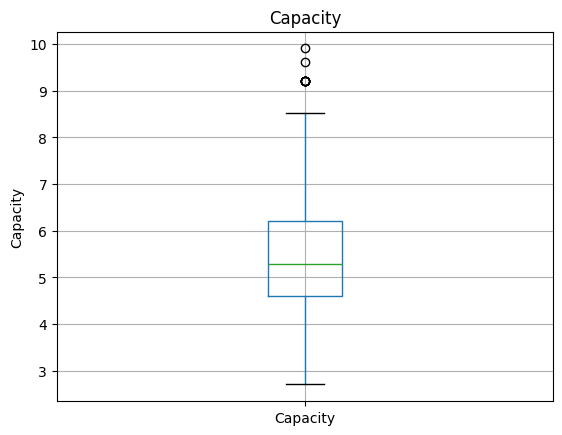

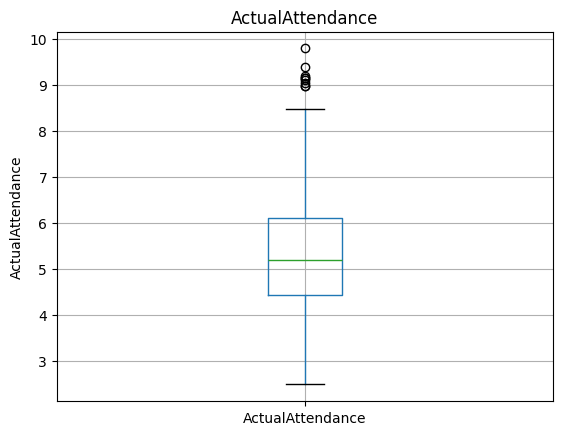

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [82]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['EventName',
 'EventType',
 'Date',
 'StartTime',
 'EndTime',
 'Location',
 'Weather_Condition',
 'Promotion_Type',
 'ActualAttendance']

In [83]:
df[categorical_features].head()


,EventName,EventType,Date,StartTime,EndTime,Location,Weather_Condition,Promotion_Type,ActualAttendance
0,Artisan Fair,Exhibition,2024-05-18,11:00:00,18:00:00,City Park,Sunny,Posters in Local Businesses,225
1,Tech Startup Pitch Night,Networking,2024-06-03,18:30:00,21:30:00,Coworking Space,Clear Skies,Online Ads,85
2,Poetry Slam,Performance,2024-06-22,19:00:00,22:00:00,Local Cafe,Partly Cloudy,Word of Mouth,60
3,Charity 5K Run,Fundraiser,2024-07-14,08:00:00,11:00:00,Riverfront Trail,Overcast,Radio Spots,400
4,Outdoor Concert Series,Music,2024-07-27,18:00:00,22:00:00,Amphitheater,Clear Skies,TV Commercials,1800


In [84]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is EventName and number of categories are 479
The feature is EventType and number of categories are 50
The feature is Date and number of categories are 581
The feature is StartTime and number of categories are 23
The feature is EndTime and number of categories are 27
The feature is Location and number of categories are 203
The feature is Weather_Condition and number of categories are 12
The feature is Promotion_Type and number of categories are 278
The feature is ActualAttendance and number of categories are 91


c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


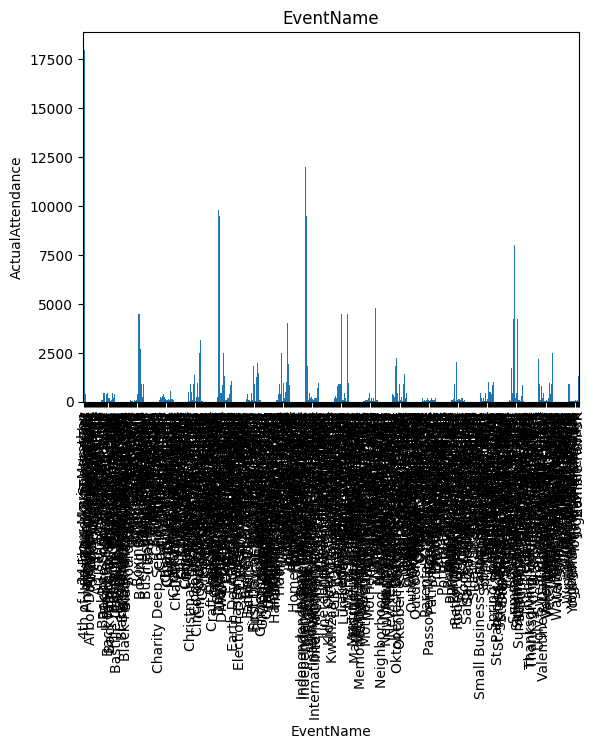

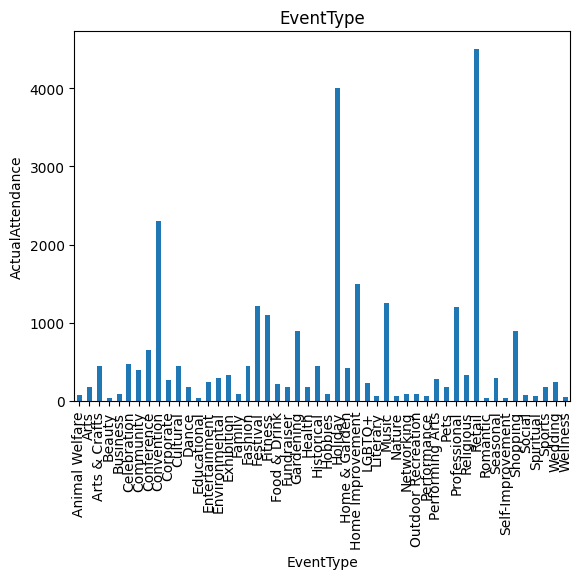

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


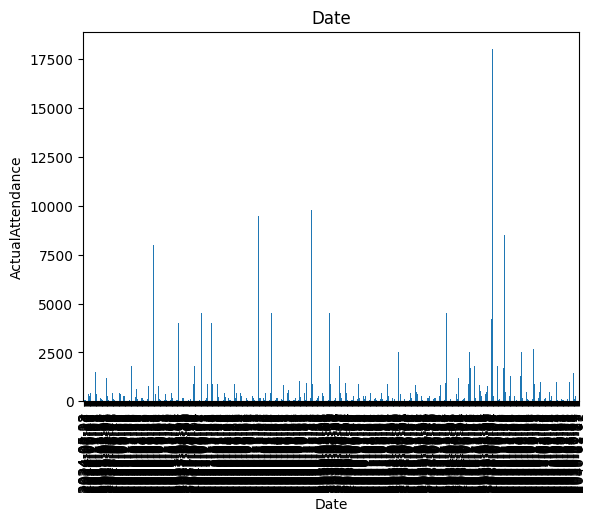

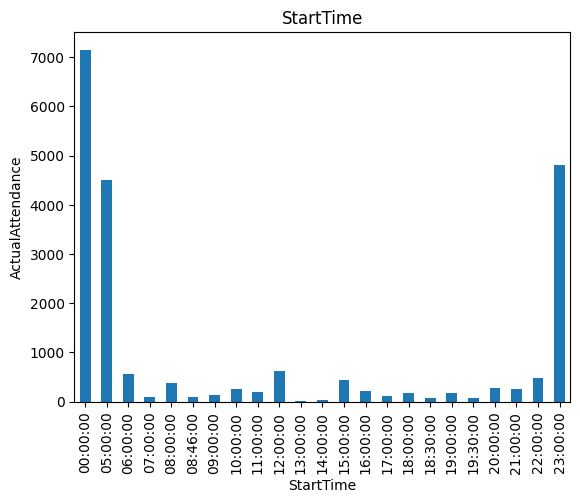

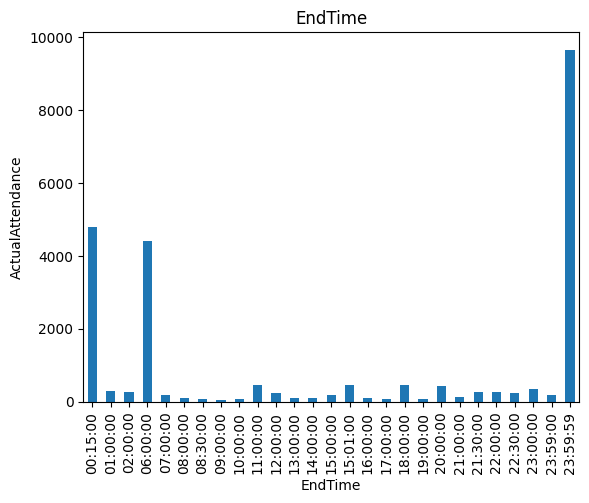

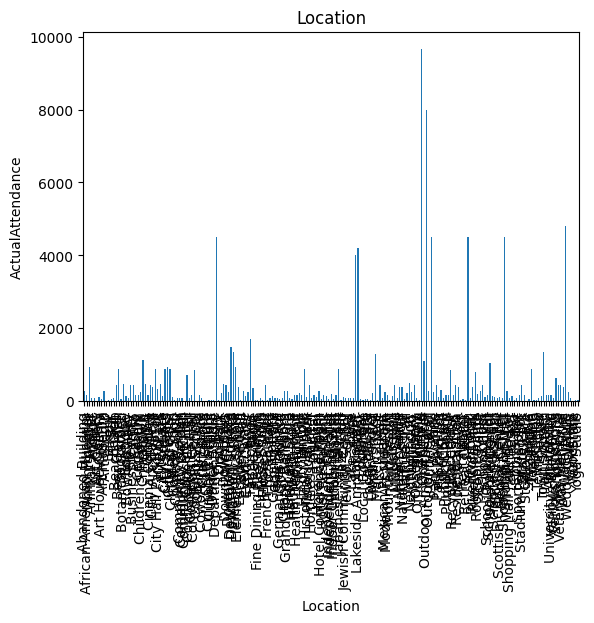

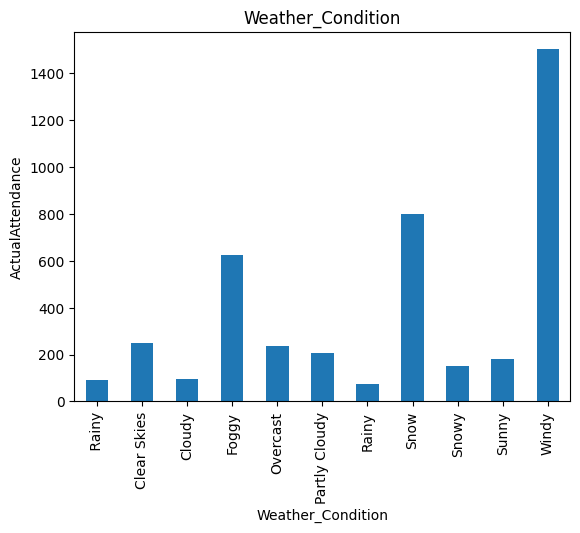

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


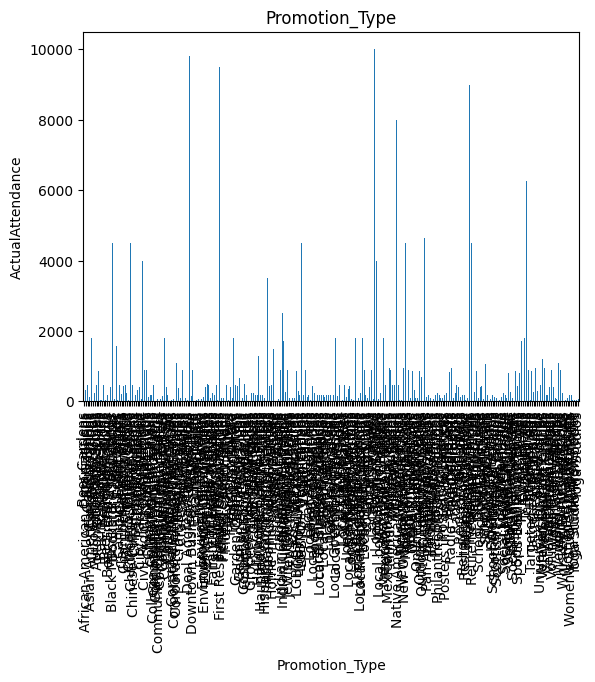

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


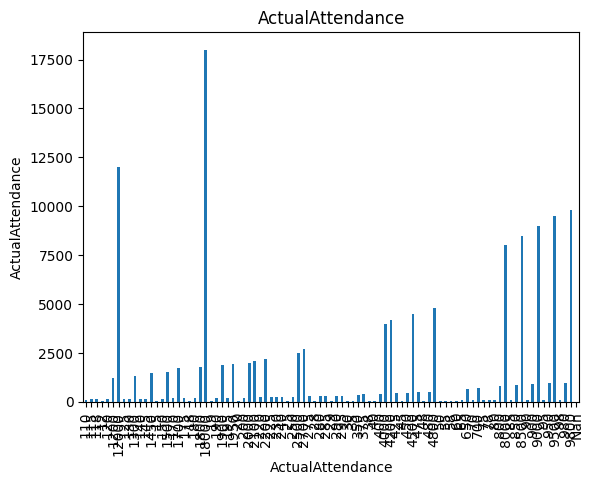

In [85]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['ActualAttendance'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('ActualAttendance')
    plt.title(feature)
    plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['ActualAttendance'],test_size=0.2,random_state=0)

In [87]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Weather_Condition: 0.0032% missing values


In [88]:
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data


In [89]:

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()
df.head()


,EventID,EventName,EventType,Date,StartTime,EndTime,Location,Weather_Condition,Promotion_Type,Capacity,ActualAttendance
0,1005,Artisan Fair,Exhibition,2024-05-18,11:00:00,18:00:00,City Park,Sunny,Posters in Local Businesses,300,225
1,1006,Tech Startup Pitch Night,Networking,2024-06-03,18:30:00,21:30:00,Coworking Space,Clear Skies,Online Ads,100,85
2,1007,Poetry Slam,Performance,2024-06-22,19:00:00,22:00:00,Local Cafe,Partly Cloudy,Word of Mouth,75,60
3,1008,Charity 5K Run,Fundraiser,2024-07-14,08:00:00,11:00:00,Riverfront Trail,Overcast,Radio Spots,500,400
4,1009,Outdoor Concert Series,Music,2024-07-27,18:00:00,22:00:00,Amphitheater,Clear Skies,TV Commercials,2000,1800


In [90]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

In [91]:
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

In [51]:
num_features=['Capacity', 'ActualAttendance']

In [52]:
for feature in num_features:
    df[feature]=np.log(df[feature])
df.head()

,EventID,EventName,EventType,Date,StartTime,EndTime,Location,Weather_Condition,Promotion_Type,Capacity,ActualAttendance
0,1005,Artisan Fair,Exhibition,2024-05-18,11:00:00,18:00:00,City Park,Sunny,Posters in Local Businesses,5.703782,5.416100
1,1006,Tech Startup Pitch Night,Networking,2024-06-03,18:30:00,21:30:00,Coworking Space,Clear Skies,Online Ads,4.605170,4.442651
2,1007,Poetry Slam,Performance,2024-06-22,19:00:00,22:00:00,Local Cafe,Partly Cloudy,Word of Mouth,4.317488,4.094345
3,1008,Charity 5K Run,Fundraiser,2024-07-14,08:00:00,11:00:00,Riverfront Trail,Overcast,Radio Spots,6.214608,5.991465
4,1009,Outdoor Concert Series,Music,2024-07-27,18:00:00,22:00:00,Amphitheater,Clear Skies,TV Commercials,7.600902,7.495542


In [53]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['ActualAttendance'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)
df.head()

,EventID,EventName,EventType,Date,StartTime,EndTime,Location,Weather_Condition,Promotion_Type,Capacity,ActualAttendance
0,1005,253,32,325,12,18,169,4,136,5.703782,5.416100
1,1006,115,12,148,3,13,46,7,47,4.605170,4.442651
2,1007,94,10,91,9,22,38,5,8,4.317488,4.094345
3,1008,304,21,399,16,20,146,6,159,6.214608,5.991465
4,1009,420,45,530,7,22,187,7,258,7.600902,7.495542


In [54]:
scaling_feature=[feature for feature in df.columns if feature not in ['EventID','ActualAttendance'] ]

In [55]:
len(scaling_feature)

9

In [56]:
scaling_feature

['EventName',
 'EventType',
 'Date',
 'StartTime',
 'EndTime',
 'Location',
 'Weather_Condition',
 'Promotion_Type',
 'Capacity']

In [57]:
df.head()

,EventID,EventName,EventType,Date,StartTime,EndTime,Location,Weather_Condition,Promotion_Type,Capacity,ActualAttendance
0,1005,253,32,325,12,18,169,4,136,5.703782,5.416100
1,1006,115,12,148,3,13,46,7,47,4.605170,4.442651
2,1007,94,10,91,9,22,38,5,8,4.317488,4.094345
3,1008,304,21,399,16,20,146,6,159,6.214608,5.991465
4,1009,420,45,530,7,22,187,7,258,7.600902,7.495542


In [58]:
feature_scale=[feature for feature in df.columns if feature not in ['EventID', 'ActualAttendance']]

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])


MinMaxScaler()

In [60]:
scaler.transform(df[feature_scale])

array([[0.5292887 , 0.65306122, 0.56034483, ..., 0.36363636, 0.49097473,
        0.41633776],
       [0.24058577, 0.24489796, 0.25517241, ..., 0.63636364, 0.16967509,
        0.26365597],
       [0.19665272, 0.20408163, 0.15689655, ..., 0.45454545, 0.02888087,
        0.22367479],
       ...,
       [0.5167364 , 0.42857143, 0.53965517, ..., 0.18181818, 0.4801444 ,
        0.35998745],
       [0.73221757, 0.67346939, 0.77068966, ..., 0.27272727, 0.85559567,
        0.48733075],
       [0.40794979, 0.51020408, 0.64827586, ..., 0.63636364, 0.31407942,
        0.41633776]])

In [61]:
data = pd.concat([df[['EventID', 'ActualAttendance']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)
data.head()

,EventID,ActualAttendance,EventName,EventType,Date,StartTime,EndTime,Location,Weather_Condition,Promotion_Type,Capacity
0,1005,5.416100,0.529289,0.653061,0.560345,0.545455,0.692308,0.836634,0.363636,0.490975,0.416338
1,1006,4.442651,0.240586,0.244898,0.255172,0.136364,0.500000,0.227723,0.636364,0.169675,0.263656
2,1007,4.094345,0.196653,0.204082,0.156897,0.409091,0.846154,0.188119,0.454545,0.028881,0.223675
3,1008,5.991465,0.635983,0.428571,0.687931,0.727273,0.769231,0.722772,0.545455,0.574007,0.487331
4,1009,7.495542,0.878661,0.918367,0.913793,0.318182,0.846154,0.925743,0.636364,0.931408,0.679994


In [62]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [63]:
y_train=data[['ActualAttendance']]
X_train=data.drop(['EventID', 'ActualAttendance'],axis=1)

In [64]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [65]:
feature_sel_model.get_support()

array([ True, False,  True, False,  True, False, False, False,  True])

In [66]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

selected_feat

X_train=X_train[selected_feat]

X_train.head()


total features: 9
selected features: 4


,EventName,Date,EndTime,Capacity
0,0.529289,0.560345,0.692308,0.416338
1,0.240586,0.255172,0.500000,0.263656
2,0.196653,0.156897,0.846154,0.223675
3,0.635983,0.687931,0.769231,0.487331
4,0.878661,0.913793,0.846154,0.679994


In [67]:
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

X_test=replace_cat_feature(X_test,features_nan)

X_test[features_nan].isnull().sum()
X_test.head()

numerical_with_nan=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>1 and X_test[feature].dtypes!='O']



for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(X_test[feature].isnull().mean(),4)))
import numpy as np
num_features=['Capacity', 'ActualAttendance']

for feature in num_features:
    X_test[feature]=np.log(X_test[feature])
X_test.head()
for feature in categorical_features:
    labels_ordered=X_test.groupby([feature])['ActualAttendance'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    X_test[feature]=X_test[feature].map(labels_ordered)
X_test.head()
scaling_feature=[feature for feature in X_test.columns if feature not in ['EventID','ActualAttendance'] ]
len(scaling_feature)
scaling_feature

X_test.head()
feature_scale=[feature for feature in X_test.columns if feature not in ['EventID', 'ActualAttendance']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_test[feature_scale])
scaler.transform(X_test[feature_scale])

tdata = pd.concat([X_test[['EventID', 'ActualAttendance']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[feature_scale]), columns=feature_scale)],
                    axis=1)
tdata.head()
tdata = tdata[['EventName', 'Date', 'EndTime', 'Capacity']]
tdata.head()

,EventName,Date,EndTime,Capacity
0,0.535088,0.540323,0.684211,0.370512
1,0.122807,0.137097,0.684211,0.147441
2,0.052632,0.048387,0.000000,0.065244
3,0.342105,0.330645,0.052632,0.258977
4,0.140351,0.096774,0.263158,0.147441


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


lr = LinearRegression()
rf = RandomForestRegressor()

models = [lr, rf]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(type(model).__name__)
    print('MAE: ', mean_absolute_error(y_train, y_pred))
    print('MSE: ', mean_squared_error(y_train, y_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))
    print('-------------------')


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print('Linear Regression MAE: ', mean_absolute_error(y_train, y_pred))
print('Linear Regression MSE: ', mean_squared_error(y_train, y_pred))
print('Linear Regression RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))



rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print('Random Forest Regressor MAE: ', mean_absolute_error(y_train, y_pred))
print('Random Forest Regressor MSE: ', mean_squared_error(y_train, y_pred))
print('Random Forest Regressor RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

LinearRegression
MAE:  0.04891854495585964
MSE:  0.0038036823387275543
RMSE:  0.06167400050854131
-------------------
RandomForestRegressor
MAE:  0.008682798861590764
MSE:  0.000403320080226162
RMSE:  0.02008283048342942
-------------------
Linear Regression MAE:  0.04891854495585964
Linear Regression MSE:  0.0038036823387275543
Linear Regression RMSE:  0.06167400050854131


c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE:  0.008879674338184113
Random Forest Regressor MSE:  0.00043808050745710784
Random Forest Regressor RMSE:  0.02093037284563053


In [69]:
yt_pred = lr.predict(tdata)

In [70]:
import numpy as np

def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy for regression models.

    Parameters:
    - y_true: numpy array or list, true values of the target variable
    - y_pred: numpy array or list, predicted values of the target variable

    Returns:
    - accuracy: float, accuracy score
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the mean absolute percentage error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate the accuracy as 100 - MAPE
    accuracy = 100 - mape

    return accuracy


In [71]:
mae = mean_absolute_error(y_train, y_pred)
100-mae*100

99.11203256618158

In [72]:
import pickle as pkl
pkl.dump(lr, open('model3.pkl', 'wb'))